In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("tab20")

from covis.utils import get_project_root

In [22]:
# jpath = get_project_root() / "output/eer_dict.json"
# with open(jpath) as f:
#     eer = json.load(f)

# rows = [4,5]
# rows.extend(range(76,86))

# weekly_reg_covid19_2020 = pd.read_excel(
#     get_project_root() / "data/publishedweek532020.xlsx",
#     sheet_name="Covid-19 - Weekly registrations",
#     skiprows=lambda x: x not in rows,
#     usecols=lambda x: x not in ["Unnamed: 1"]
# )

# weekly_reg_covid19_2020 = weekly_reg_covid19_2020.set_index("Week number").transpose()
# weekly_reg_covid19_2020.rename(columns={"covid19 deaths, all ages":"covid19 deaths, all ages (2020)"}, inplace=True)
# weekly_reg_covid19_2020.rename(columns=eer, inplace=True)

# for col in [col for col in weekly_reg_covid19_2020.columns if col not in ["Week ended"]]:
#     weekly_reg_covid19_2020[col] = weekly_reg_covid19_2020[col].astype(int)

# weekly_reg_covid19_2020["total"] = weekly_reg_covid19_2020.sum(axis=1)

# print(f"covid19 deaths 2020\n{weekly_reg_covid19_2020.shape}")
# weekly_reg_covid19_2020.head(50)

### will look at the period march 2020 - may 2020 (before advice / lockdowns occur)

In [40]:
rows = [3,4]
rows.extend(range(16,23))

total = pd.read_excel(
    get_project_root() / "data/publishedweek532020.xlsx",
    sheet_name="UK - Covid-19 - Weekly reg",
    skiprows=lambda x: x not in rows,
    # usecols=lambda x: x not in ["Unnamed: 1"]
)

for i in range(1,8):
    total["Week number"][i] = total["Unnamed: 1"][i]

total.drop(columns=["Unnamed: 1"], inplace=True)

In [41]:
total = total.set_index("Week number").transpose()

In [45]:
total.dtypes

Week number
Week ended      datetime64[ns]
Under 1 year             int64
01-14                    int64
15-44                    int64
45-64                    int64
65-74                    int64
75-84                    int64
85+                      int64
dtype: object

In [44]:
# cast to integers
for col in [col for col in total.columns if col not in ["Week ended"]]:
    total[col] = total[col].astype(int)

In [47]:
total_mam = total[total["Week ended"].between("2020-03-01", "2020-05-31")].copy()

In [48]:
total_mam

Week number,Week ended,Under 1 year,01-14,15-44,45-64,65-74,75-84,85+
10,2020-03-06,0,0,0,0,0,0,0
11,2020-03-13,0,0,0,1,1,3,0
12,2020-03-20,0,0,1,8,25,35,44
13,2020-03-27,0,0,7,75,113,207,205
14,2020-04-03,0,0,49,445,701,1352,1254
15,2020-04-10,0,0,78,805,1218,2467,2320
16,2020-04-17,0,2,104,1020,1527,3089,3753
17,2020-04-24,0,0,109,884,1297,2878,3841
18,2020-05-01,0,0,54,555,891,2046,3134
19,2020-05-08,1,0,43,357,540,1414,2071


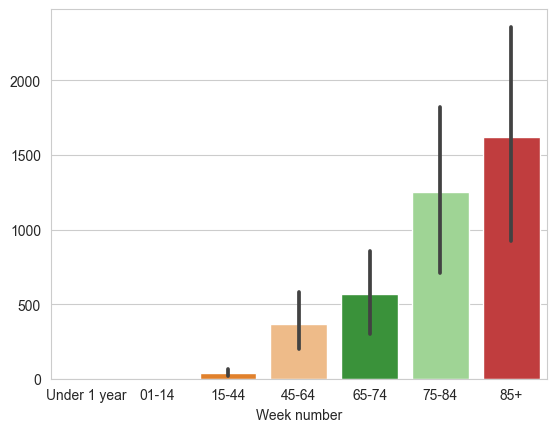

In [55]:
sns.barplot(
    total_mam
);

In [58]:
def get_age_data_2020(rows, start, end):
    df = pd.read_excel(
        get_project_root() / "data/publishedweek532020.xlsx",
        sheet_name="UK - Covid-19 - Weekly reg",
        skiprows=lambda x: x not in rows
    )

    for i in range(1,8):
        df["Week number"][i] = df["Unnamed: 1"][i]

    df.drop(columns=["Unnamed: 1"], inplace=True)

    df = df.set_index("Week number").transpose()
    
    for col in [col for col in df.columns if col not in ["Week ended"]]:
        df[col] = df[col].astype(int)

    df = df[df["Week ended"].between(f"{start}", f"{end}")]

    return df

In [59]:
rows = [3,4]
rows.extend(range(25,32))

males_mam = get_age_data_2020(rows, "2020-03-01", "2020-05-31")

In [60]:
males_mam

Week number,Week ended,Under 1 year,01-14,15-44,45-64,65-74,75-84,85+
10,2020-03-06,0,0,0,0,0,0,0
11,2020-03-13,0,0,0,1,0,1,0
12,2020-03-20,0,0,0,4,14,22,27
13,2020-03-27,0,0,5,48,78,133,106
14,2020-04-03,0,0,26,284,469,854,666
15,2020-04-10,0,0,50,528,800,1562,1264
16,2020-04-17,0,0,63,676,1009,1866,1830
17,2020-04-24,0,0,68,596,839,1678,1734
18,2020-05-01,0,0,35,373,592,1111,1352
19,2020-05-08,1,0,22,236,333,806,826


In [61]:
rows = [3,4]
rows.extend(range(34,41))

females_mam = get_age_data_2020(rows, "2020-03-01", "2020-05-31")

In [62]:
females_mam

Week number,Week ended,Under 1 year,01-14,15-44,45-64,65-74,75-84,85+
10,2020-03-06,0,0,0,0,0,0,0
11,2020-03-13,0,0,0,0,1,2,0
12,2020-03-20,0,0,1,4,11,13,17
13,2020-03-27,0,0,2,27,35,74,99
14,2020-04-03,0,0,23,161,232,498,588
15,2020-04-10,0,0,28,277,418,905,1056
16,2020-04-17,0,2,41,344,518,1223,1923
17,2020-04-24,0,0,41,288,458,1200,2107
18,2020-05-01,0,0,19,182,299,935,1782
19,2020-05-08,0,0,21,121,207,608,1245
